**Student name:** Jakub Niedziela

**Student ID:** 20224740

# Lab 2: Markov Decision Processes

### Instructions: **TODO** tags

This lab on MDPs has two parts:
1. You will need to formulate written scenarios as MDPs.  For this part, please submit drawings of your MDPs - either decent quality photos of sketches, or (if you're feeling fancy) [beautiful tikz graphs](https://www.mathcha.io/editor) (I recommend using the mathcha editor linked here instead of making tikz plots from LaTeX, unless you *really* know what you're doing)
2. In the second half, you will have to implement the MDP from the course. We will use a framework very similar to what we have done before in the Bandits scenario.

As usual, please *read* and *run* the notebook chronologically, and fill in the **TODO**s as you encounter them.
* <span style="color:blue"> Blue **TODOs** </span> means you have to implement the TODOs in the code.
* <span style="color:red"> Red **TODOs** </span> means you have to submit an explanation (of graph/results).

At each section, <span style="color:green"> (xx points) </span> indicates the number of points of the entire section (labs are graded out of 10).

### Images in notebook cells
To attach an image to a notebook cell, you can simply **drag & drop** it in the cell. This will create a link like `![image.png](attachment:image.png)` in the cell where your mouse dropped the image. If you want to **adjust the size** of the image, you can *then* replace the link with `<img src="attachment:image.png" width="500">` and this should generate a plot of required width; simply adjust the `width` parameter then.

**If the drag&dropping is acting up** - sometimes it refuses to paste an image (often the 2nd) in a cell. If this happens, you can create a cell below and paste it there. Sorry for the trouble!


## 1. <span style="color:green"> (6 points) </span> Markov Decision Process Statements
*Course Reminder*: a Markov Decision Process (MDP) is a tuple $M = (\mathcal{S}, \mathcal{A}, \mathcal{R}, \gamma, p)$ with $\mathcal{S}$ a set of states, $\mathcal{A}$ a set of actions, $\mathcal{R}$ a set of rewards, $\gamma$ the discount factor, and crucially $p$ the dynamics function $p\left(s^\prime,r \mid s,a \right)$. An MDP is a mathematical object meant to model non-deterministic decision-making situations.
The MDP formalizes the RL framework, by providing the core elements: the sets of states and actions in which our problem takes place, and the dynamics $p$ that define the environment. All that is left to generate a trajectory is the *policy* $\pi \left(a \mid s\right)$ defining the agent. 

Below you can visualize the **link between the RL framework (in black) and its mathematical formulation (in green), as well as its implementation (blue).**
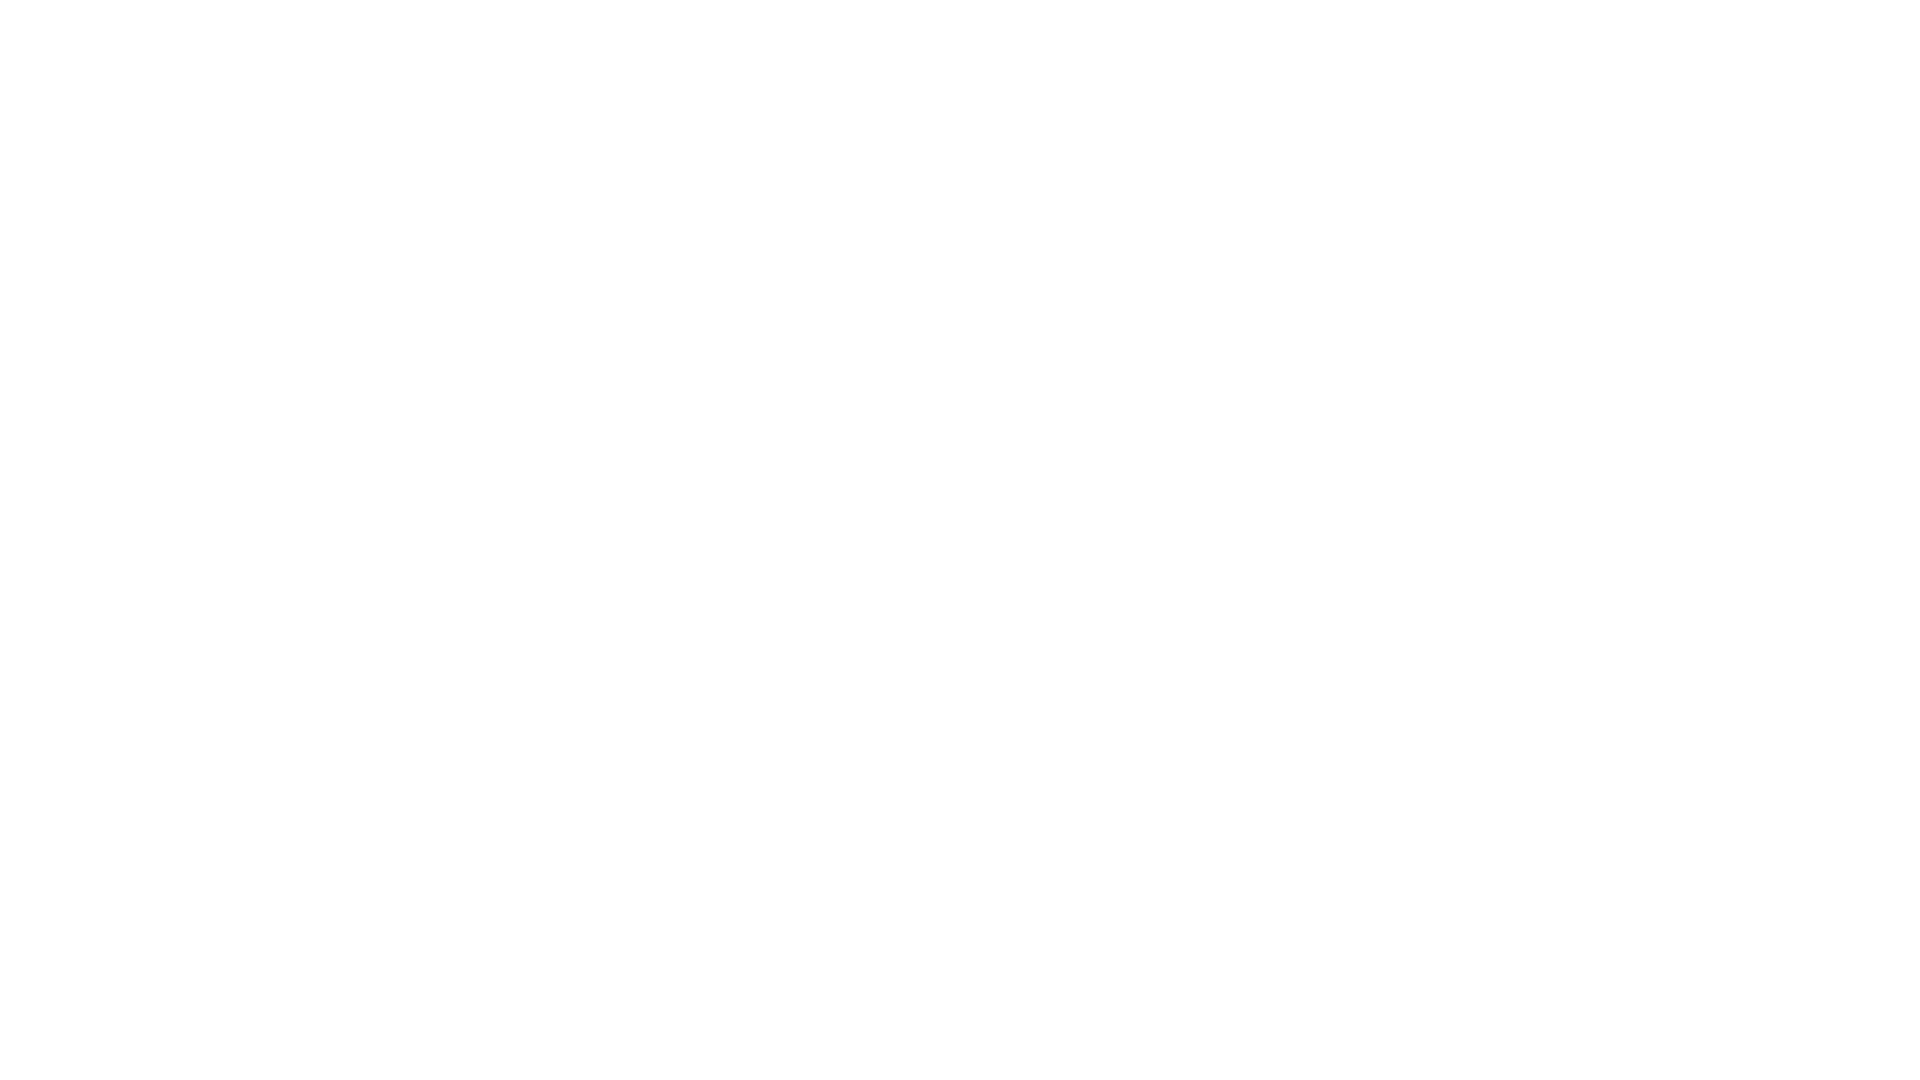


In this lab, you will have to turn written descriptions of problems into MDPs. Please use the convention below for the drawing of your MDPs:

- states as round, white nodes, with the state name inside
- actions as small black nodes sprouting from the states, with the action name closeby
- transition probability and reward on the edge sprouting from the actions and leading to some other state.
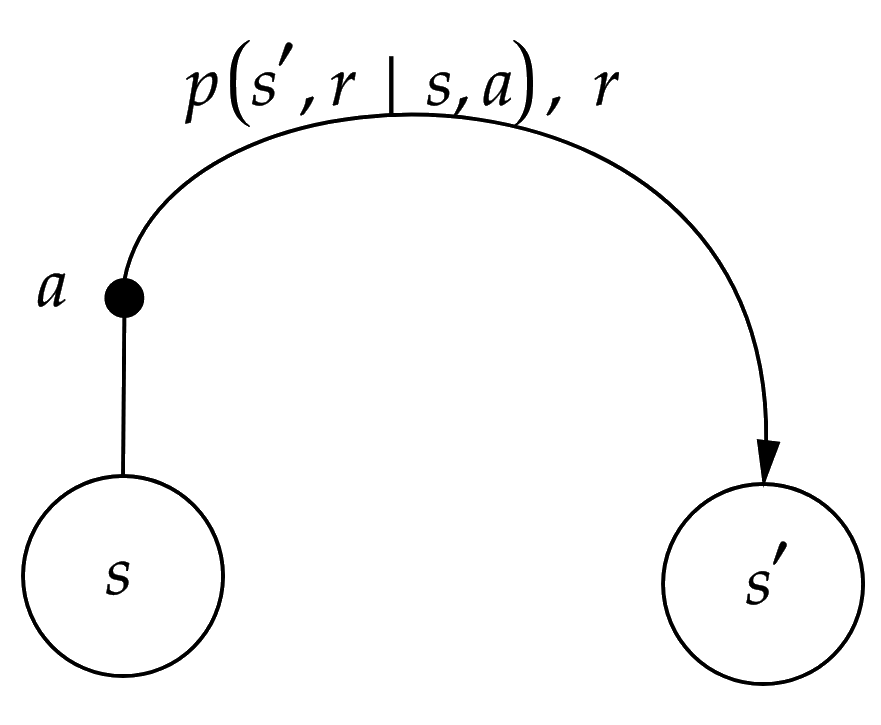

The example below is drawn from the [RL book](http://incompleteideas.net/book/the-book-2nd.html) Chapter 3, page 52, example 3.3; you are encouraged to hop there to understand how to turn a problem statement into an MDP. **Please write actual scalar reward and probability values instead of variable names, unlike in the example below**.
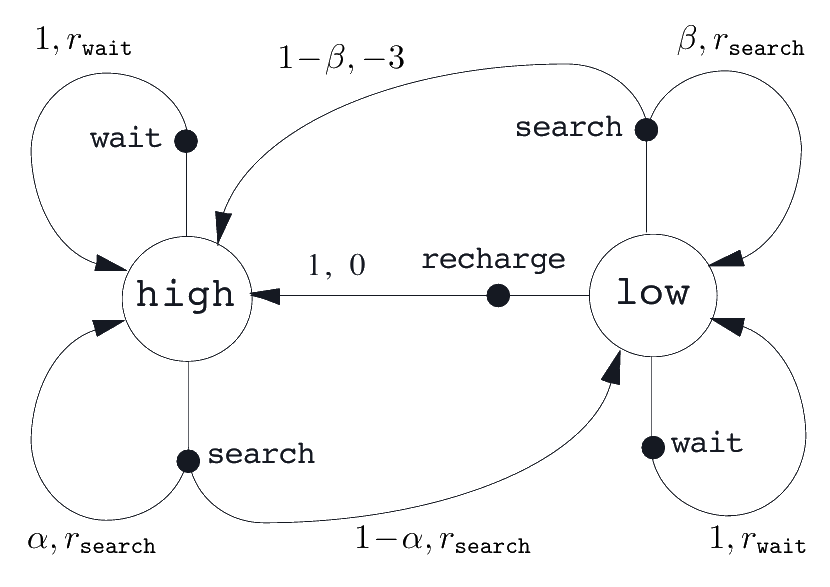
Overall, you can always have this kind of graph in mind when we talk about MDPs, even theoretically.  

### 1.1. Problem statement: a healthy lifestyle
The probabilities and rewards are up to you, but they should be consistent with the problem statement.

> You are a healthy, sane person, but with a weak immune system.
> Every year, you have some probability to get sick, which lowers if you remember to do a health check. When do do a health check and you stay healthy, you sometimes notice it and are happy about it.
> If you are sick, your condition is bad and doing nothing will result in high chances of death, and no chance of recovery whatsoever.
> Your doctor prescribes some medicine for you, which - if you remember to take it- has some probability to cure you. However, even then, chances to die remain, although lowered.

When designing the MDP, make sure that the optimal behavior is to stay healthy and alive!

<span style="color:red"> **TODO** </span>: **Drag & drop** your sketch in this cell below. **Explain** your sketch briefly.
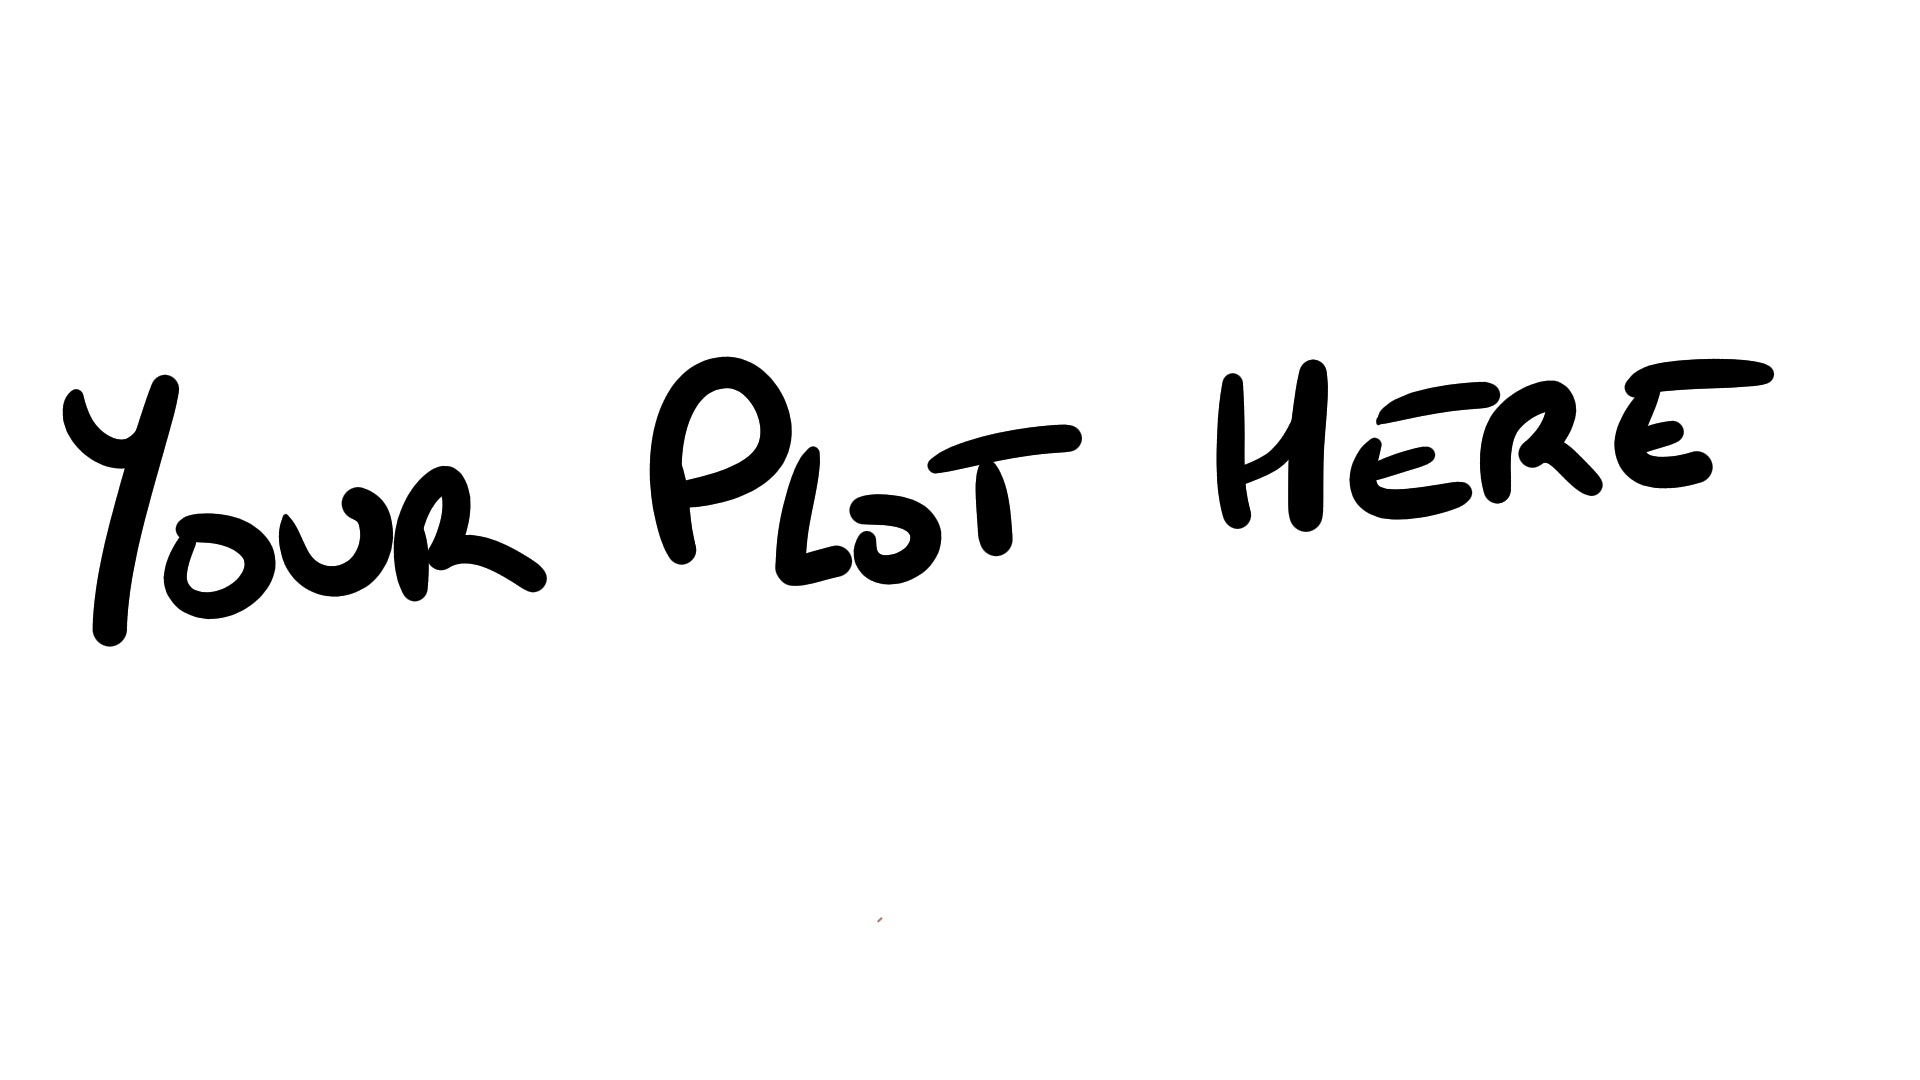

#### Graph 1.1. - Health Problem
In this case I chose to use letters for probabilities, as I do not know them exactly. When it comes to the state action set in my understanding it looks like this:
 - S = {healthy, sick, death}
 - A(healthy) = {health check, no health check}
 - A(sick) = {do nothing, take medicine}
 - A(death) = {}

 The only positive reward we can get is we get a health check and then stay healthy, so I set it to 10. Also as we do not want to die, the reward in that state is -inifity so that we omit it by all means.
 
 ![Alt text](Graphs/health.gv.png)

### 1.2. Problem statement: Bowling
```
          |||
          |||
          _._
        .' ..`.
        |     |  <--- ball
         `---'          

           0
          0 0
         0 0 0   <--- pins
        0 0 0 0
```
We want to model the game of bowling, but we will need to severely simplify it.
The scoring system is quite complex, so let's just say the goal is to hit all the pins in the least tries possible.
The player observes the pins and can choose to throw the ball {left, middle, right}, but the transitions are highly stochastic (player's skill and consistency; hard to know the precise outcome of a throw).
- What would the states of the environment be?
- How many states are there in this environment?
Draw a subset of the MDP (stay below 10 states, abstract out the rest), with initial and terminal state, and some possible transitions from all 3 actions from the start state.

<span style="color:red"> **TODO** </span>: **Drag & drop** your sketch in this cell below. **Answer** the questions and **explain** your sketch briefly.
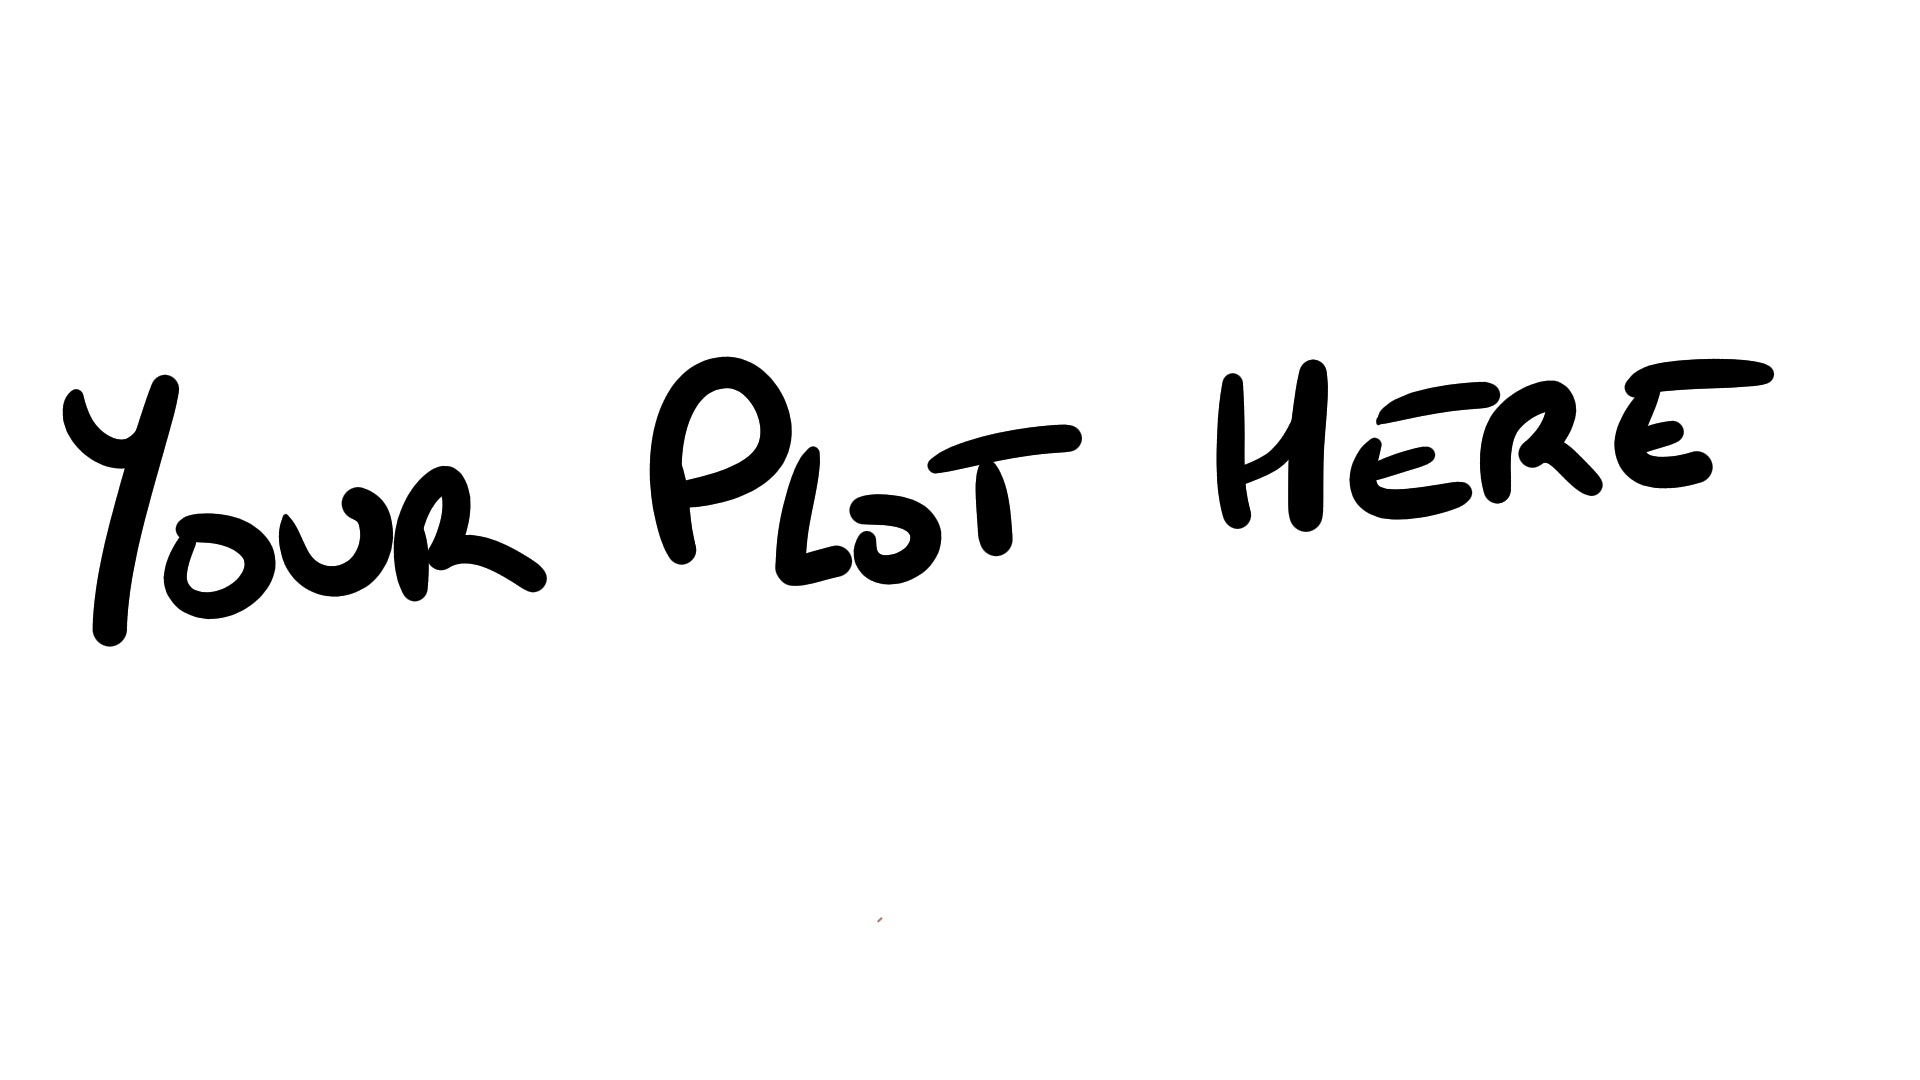

#### Graph 1.2. - bowling
First of all this problem is definitely too large to draw, as the number of states is 2048 (2^10). The states would be for example 1 and 0, where 1 would represent pin standing and 0 that it fell. So in such a case we start with only ones and our goal is to reach only zeros in as little moves as it is possible. Besides that from starting state there would be a connection to every possible state, even starting one (as we can fail to hit the pins). Therefore I limit the drawing to just few states.

I drew just 4 states
 - initial with all pins up
 - one before terminal - with only one pin up
 - terminal - with all pins down
 - other - to represent 2048 - 3 possible states (besides ones drawn)

In each case the probability of reaching given state is some value dependant on current state, and action chosen. The reward is always -1, as our goal is to git all pins as quickly as we can, so each throw more is a cost. Also I assume that initial state can be only reached from initial state (when none of pins are hit).

![Alt text](Graphs/bowling.gv.png)

### 1.3. Problem statement: Course's maze
In the slides 7 and 8 of the course, we used a same maze as MDP example:
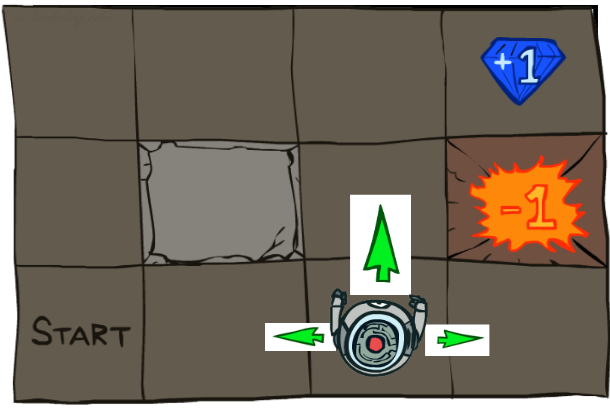

**Draw** the corresponding MDP graph for this problem. A few things need to be clarified:

- Assume no noise. It would make the plot very messy!
- You can use capitals N S E W to shorten the North South East West actions.
- The two states indicated `+1` and `-1` are not yet terminal. They both lead to the same state TERMINAL with unique available action EXIT, and the transition yields the indicated rewards. 
- Assume a small living reward of -0.1 that does not apply for the exit transition.

Note that we could also frame this problem with states indicated `+1` and `-1` being terminal; we do not do this for plotting purposes in the following lab. Stay tuned!

- In addition to the MDP, please **draw** (on the side or on a separate plot) how the **start state** would look if there was `noise=0.2`. As a reminder, the `noise` parameter *in this specific MDP* is the probability that the agent is *not* taking the expected action - e.g. doing west when asked north. In our case, it takes you with equal probability to the two orthogonal states, e.g. when asking North, 10% proba to go East, 10% to go West.

#### Graph 1.3.1. - no noise
In this graph, we see possible actions for the Course maze, I omited the probabilities of all actions as there is no noise, and therefore all of them are equal to 1. Also for most actions (N, E, S, W) living reward is -0.1 so I omited it as well. Thanks to this the graph is more readable. Only for near terminal states I wrote the reward, dependant on state. They both lead to state TERMINAL, which is the end of the game.

![Alt text](Graphs/maze.gv.png)

#### Graph 1.3.2. - noise = 0.2
In this example there are only 3 states - you can stay in start state or go to one of its 2 neighboors. In case of some actions the probabilities sum up, so I did not draw the reduntant edges.

![Alt text](Graphs/maze_noise.gv.png)

## 2. <span style="color:green"> (4 points) </span> <span style="color:blue"> **TODO** </span>: MDP Implementation
By now, you should have a solid grasp of the intricacies of the MDP. The time has come to implement one!
We will implement the MDP from the course (statement 4 above). However, unlike when you had to draw it, we will use `noise=0.2`.

There are multiple methods that we want from an MDP. Let's list them:
- <span style="color:blue"> **TODO** </span> `get_states`: returns all the possible states of the MDP. In other words, all the inputs that the *agent can observe*.
- <span style="color:blue"> **TODO** </span> `get_actions`: given a state, returns all the possible actions from that state.
- <span style="color:blue"> **TODO** </span> `p`: the dynamics, for a given state-action input pair. Return all the possible state-reward output pairs, along with the probability for that to happen. 
- <span style="color:blue"> **TODO** </span> `is_terminal`: given a state, returns whether it is terminal.

These methods provide everything we need to know to draw the MDP. However, if we wanted to use it in practice to run an episode - i.e., use the MDP as an *Environment* to interact with, we need a few different methods. The agent needs to start somewhere, in some starting episode sampled from a subset of $\mathcal{S}$ sometimes called $\mathcal{S}_0$. Then, we need to sample from the dynamics to output a state and reward given a state and action. We follow the [`OpenAI gym`](https://gym.openai.com/docs/) convention:
- <span style="color:blue"> **TODO** </span> `reset`: initializes the environment, outputs a starting state.
- <span style="color:blue"> **TODO** </span> `step`: given an action, performs one step in the environment. Formally, samples from the dynamics. For more complex environment like video games however, it is unthinkable to explicitely formulate the dynamics, but it is generally easy to compute a single transition. Outputs the next state, reward, and done signal, i.e. whether we reached a terminal state.

Note that these functions need to keep track of where the agent is. Feel free to add what you want to the `__init__` method if needed.

*Note: Normally in `gym`, the action space would be defined as `Discrete(5)`, meaning 5 possible actions ranging from 0 to 4, since the strings make no actual sense for the agent. In our environment, we will use actions as strings 'north' 'east' etc. for clarity.*

In [1]:
import numpy as np
import gym
from gym import spaces

In [2]:
class CourseEnv(gym.Env):
    """ Gridworld environment from the Course. A 4x3 grid with 2 states in the upper right corner 
    leading to the terminal state.
        """
    def __init__(self):
        self.height = 3
        self.width = 4
        self.observation_space = spaces.Tuple(( # observations come in (x,y) tuples with x:height, y:width.
                spaces.Discrete(self.height),
                spaces.Discrete(self.width)
                ))
        self.actions = ['north', 'east', 'south', 'west', 'exit'] # writing them out for a common convention
        self.noise = .2
        self.start = (2,0)
        self.near_terminals = ((0,3), (1,3)) # state from which there is only the exit action to get to TERMINAL
        self.obstacles = [(1,1)]
        self.living_reward = -0.1
        # You can add elements to this init method if needed.

    def step(self, action):
        """ Moves the agent according to the input action.
        You can either sample from the dynamics, or simply (if it feels easier) code the agent's movement.
        """
        print("Executing action {}".format(action))

        # Check if chosen action possible, else ask for new input
        try:
            assert action in self.action_space[self.S]
        except AssertionError:
            print(f'This action is not possible in current state! Please choose from {self.action_space[self.S]}!!!')
            action = input('Please input an action: ')

        # Calculate possible end states and respective probabilities
        new_states = []
        probs = []
        for option, prob in self.dynamics[self.S][action].items():
            new_states.append(option)
            probs.append(prob)
        
        # Choose new state based on probabilities
        idx = np.random.choice([i for i in range(len(new_states))], p=probs)
        next_state = new_states[idx][0]
        reward = new_states[idx][1]

        if next_state == 'TERMINAL':
            done = True
        else:
            done = False

        # Update current state
        self.S = next_state
        
        return next_state, reward, done, {} # ignore but keep this last element {}; it is within the gym convention.
    

    def reset(self):
        """ Prepares for a new episode."""

        # Function to calculate MDP dynamics
        def dynamics(noise, state_space, actions, living_reward, obstacles, near_terminals):

            moves_prob = {
                'north':{
                    'move':[(-1, 0), (0, 1), (0, -1)],
                    'move_p':[1-noise, noise / 2, noise / 2]
                },
                'south':{
                    'move':[(1, 0), (0, 1), (0, -1)],
                    'move_p':[1-noise, noise / 2, noise / 2]                
                },
                'west':{
                    'move':[(0, -1), (1, 0), (-1, 0)],
                    'move_p':[1-noise, noise / 2, noise / 2]                
                },
                'east':{
                    'move':[(0, 1), (1, 0), (-1, 0)],
                    'move_p':[1-noise, noise / 2, noise / 2]                
                }
            }

            dynamics = {S:{action:{} for action in actions if action != 'exit'} for S in state_space}

            for S in state_space:
                for action in actions:
                    reward = living_reward
                    if S in obstacles:
                        continue

                    if S in near_terminals:
                        if S == (0, 3):
                            reward = 1
                        if S == (1, 3):
                            reward = -1
                        if action == 'exit':
                            next_state = 'TERMINAL'
                            dynamics[S]['exit'] = {}
                            dynamics[S][action][(next_state, reward)] = 1
                    elif action != 'exit':
                        moves = moves_prob[action]['move']
                        moves_p = moves_prob[action]['move_p']
                        for i, move in enumerate(moves):
                            next_state = (S[0] + move[0], S[1] + move[1])
                            if next_state not in state_space or next_state in obstacles:
                                next_state = S

                            if (next_state, reward) in dynamics[S][action]:
                                dynamics[S][action][(next_state, reward)] += moves_p[i]
                            else:
                                dynamics[S][action][(next_state, reward)] = moves_p[i]
                    

            return dynamics, moves_prob

        self.S = self.start  # Initialise start state

        # Initialise state and action space
        self.state_space = [(i, j) for i in range(self.height) for j in range(self.width)]
        self.action_space = {}
        for state in self.state_space:
            if state in ((0,3), (1,3)):
                self.action_space[state] = ['exit']
            elif state in [(1,1)]:
                self.action_space[state] = []
            else:
                self.action_space[state] = self.actions[:-1]
        # Initialise MDP dynamics
        self.dynamics, self.move_probs = dynamics(
            self.noise, 
            self.state_space, 
            self.actions, 
            self.living_reward, 
            self.obstacles, 
            self.near_terminals
            )

        print(f"Agent pos: {self.S}")
    
    def available_actions(self, state=None):
        """
        List of available actions in the provided state
        Parameters
        ----------
        state: tuple (position), string ('TERMINAL') or None
            state from which to provide all actions. If None, use the current environment state.
        Returns
        -------
        ret : list
            List of all actions available in the provided state.
        """
        if not state:
            actions = self.action_space[self.S]
        else:
            actions = self.action_space[state] if state != 'TERMINAL' else 'None'
        return actions
    
    def p(self, state, action):
        """
        Dynamics function p of the MDP in this state and action.
        Parameters
        ----------
        state: tuple (position) or string ('TERMINAL')
            state from which to provide all actions. If the terminal state is provided, raises an error, 
            as there are no dynamics from the terminal state. 
        action: string 
            in list in ['north', 'east', 'south', 'west', 'exit'] with proper state
        Returns
        -------
        ret : dict
            dictionary of (next_state, reward) pairs with: corresponding probabilities
        """
        return self.dynamics[state][action] if state != 'TERMINAL' else ValueError
        
    
    def is_terminal(self, state=None):
        """
        Whether the input state is terminal (string 'TERMINAL').
        If no input state is provided, use the self.S state (assumes there is an ongoing episode).
        Parameters
        ----------
        state: tuple (position), string ('TERMINAL') or None
            state from the environment. If None is provided, use the self.S state. 
        Returns
        -------
        ret : bool
            Boolean indicating whether the state is terminal.
        """
        return True if state == "TERMINAL" else False
    
    def states(self):
        """
        Set (as a list) of all states of the MDP, i.e. set $\mathcal{S}$
        Returns
        -------
        ret : list
            List of all possible states in the environment.
        """
        return self.state_space

        
    def render(self):
        """ This method is provided to you. 
        Use this to plot the current position of an agent in your environment.
        """
        s = np.zeros((self.height, self.width), dtype=int).astype(str)
        s[self.start] = 'S'
        s[self.obstacles[0]] = 'X'
        s[self.near_terminals[0]] = '+'
        s[self.near_terminals[1]] = '-'
        s[self.S] = '.'
        
        print(self.S)
        print(s)
        # you can uncomment the following line when the available_actions method is implemented:
        print("Available actions: {}".format(self.available_actions()))


Let's test the different functions of your MDP. <span style="color:red"> **TODO** </span> **Run** the following cells and check that the outputs make sense.

In [3]:
mdp = CourseEnv()
mdp.reset()

Agent pos: (2, 0)


In [4]:
mdp.states()

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3)]

In [5]:
mdp.available_actions()

['north', 'east', 'south', 'west']

In [6]:
print(mdp.available_actions((0,0)))
print(mdp.available_actions((0,3)))
print(mdp.available_actions('TERMINAL'))

['north', 'east', 'south', 'west']
['exit']
None


In [7]:
mdp.p((0, 0), 'north')

{((0, 0), -0.1): 0.9, ((0, 1), -0.1): 0.1}

In [8]:
print(mdp.is_terminal((0,0)))
print(mdp.is_terminal((0,3)))
print(mdp.is_terminal('TERMINAL'))

False
False
True


Now play your environment! <span style="color:red"> **TODO** </span> Please submit your notebook with an episode that shows **a successful trajectory** (reaching the positive reward) **and the existence of the obstacle** (the agent cannot step on it).

In [9]:
env = mdp
state = env.reset()
total_r = 0
steps = 0
while True:
    env.render()
    action = input("Please input an action: ")
    state, reward, done, info = env.step(action)
    total_r += reward
    steps += 1
    if done:
        break

print("Done in {} steps with total reward {}".format(steps, total_r))

Agent pos: (2, 0)
(2, 0)
[['0' '0' '0' '+']
 ['0' 'X' '0' '-']
 ['.' '0' '0' '0']]
Available actions: ['north', 'east', 'south', 'west']
Executing action north
(1, 0)
[['0' '0' '0' '+']
 ['.' 'X' '0' '-']
 ['S' '0' '0' '0']]
Available actions: ['north', 'east', 'south', 'west']
Executing action east
(1, 0)
[['0' '0' '0' '+']
 ['.' 'X' '0' '-']
 ['S' '0' '0' '0']]
Available actions: ['north', 'east', 'south', 'west']
Executing action north
(0, 0)
[['.' '0' '0' '+']
 ['0' 'X' '0' '-']
 ['S' '0' '0' '0']]
Available actions: ['north', 'east', 'south', 'west']
Executing action east
(0, 1)
[['0' '.' '0' '+']
 ['0' 'X' '0' '-']
 ['S' '0' '0' '0']]
Available actions: ['north', 'east', 'south', 'west']
Executing action east
(0, 2)
[['0' '0' '.' '+']
 ['0' 'X' '0' '-']
 ['S' '0' '0' '0']]
Available actions: ['north', 'east', 'south', 'west']
Executing action east
(0, 3)
[['0' '0' '0' '.']
 ['0' 'X' '0' '-']
 ['S' '0' '0' '0']]
Available actions: ['exit']
Executing action exit
Done in 7 steps wit